In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from scipy import stats
from sklearn.externals.six import StringIO
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)
plt.style.available
plt.style.use('seaborn-white')

pd.set_option('display.width',5000)
pd.set_option('display.max_columns',60)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [3]:
# import csv file'
sample=pd.read_csv('/Users/prashant/Desktop/data.csv')
sample.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,0,9,2014-08-03,2014-08-08,2,1,1,12812,5,0,1,2,50,368,83


##  Exloring the data

In [4]:
sample.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,5.858590,2.020710,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,3.722823,0.909774,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,10.000000,9.000000,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [5]:
sample['date_time'].min()


'2013-01-07 00:33:47'

In [6]:
sample['date_time'].max()

'2014-12-31 23:47:14'

In [7]:
#chenking number of unique cities
sample['user_location_city'].nunique()

10779

In [8]:
# unique counts
def unique_counts(sample):
   for i in sample.columns:
       count = sample[i].nunique()
       print(i, ": ", count)


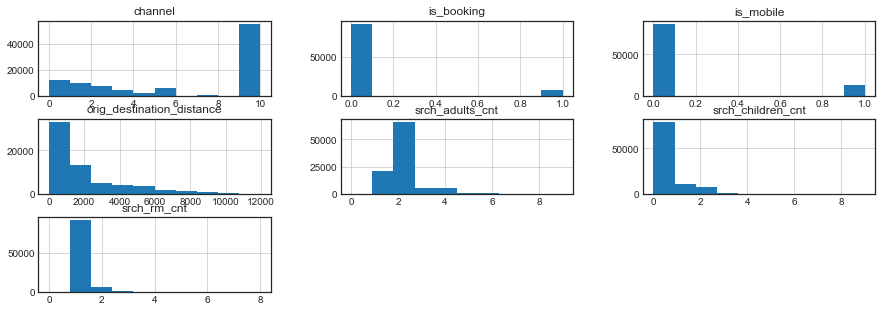

In [9]:
# sample.hist()
d=sample[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist()

In [10]:
# correlations
pd.crosstab(sample['is_booking'], sample['srch_rm_cnt'])
sample.groupby('srch_rm_cnt')['is_booking'].mean()
sample['srch_children_cnt'].corr(sample['is_booking'])
sample.corr()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
Unnamed: 0,1.000000,0.005119,-0.000626,0.001028,0.000501,-0.002442,-0.003072,0.010300,-0.006413,-0.000838,-0.000163,-0.003140,0.000239,-0.004142,0.001031,-0.003505,-0.002716,-0.004491,0.006402,0.003373,0.004371,-0.005887
site_name,0.005119,1.000000,-0.637743,0.159283,0.130818,-0.013471,0.027609,0.030404,-0.005418,0.048820,-0.027780,-0.013405,-0.031962,0.016585,0.034895,-0.006934,-0.013460,0.022274,0.201760,0.263167,-0.068316,-0.026689
posa_continent,-0.000626,-0.637743,1.000000,0.179726,-0.034647,0.039227,0.049808,-0.015209,0.016331,-0.093459,0.089680,0.012350,0.034453,-0.033712,-0.015535,0.037172,0.013319,-0.018952,-0.333578,-0.156578,0.049214,0.018297
user_location_country,0.001028,0.159283,0.179726,1.000000,0.058496,0.122686,0.047689,-0.021091,0.003728,-0.025284,0.109999,0.042526,0.037101,0.000858,0.013486,0.028888,0.001284,0.003539,-0.063744,0.097624,0.015569,-0.011876
user_location_region,0.000501,0.130818,-0.034647,0.058496,1.000000,0.132457,0.136560,0.002225,0.016982,0.040482,-0.001600,0.005487,0.014009,0.000254,0.022567,0.001376,0.000253,-0.007570,0.043027,-0.050301,0.040367,0.004984
user_location_city,-0.002442,-0.013471,0.039227,0.122686,0.132457,1.000000,0.014178,-0.007989,-0.003741,0.013032,0.023497,0.006628,0.002638,-0.000694,0.000786,-0.004399,-0.002655,-0.002175,0.007759,-0.001987,0.008558,0.000102
orig_destination_distance,-0.003072,0.027609,0.049808,0.047689,0.136560,0.014178,1.000000,0.017015,-0.059464,0.041991,-0.000398,-0.024039,-0.059722,-0.012484,-0.036314,-0.042859,-0.033480,0.009483,0.416180,0.254321,-0.090112,0.003624
user_id,0.010300,0.030404,-0.015209,-0.021091,0.002225,-0.007989,0.017015,1.000000,-0.011439,-0.018901,-0.003593,-0.007370,0.002983,-0.001625,0.002716,0.007133,0.001561,0.001355,0.002447,0.008707,-0.002463,0.003202
is_mobile,-0.006413,-0.005418,0.016331,0.003728,0.016982,-0.003741,-0.059464,-0.011439,1.000000,0.046903,-0.030770,0.016661,0.018211,-0.022565,-0.007140,-0.016039,-0.028623,0.008084,-0.024144,-0.029574,0.007644,0.012145
is_package,-0.000838,0.048820,-0.093459,-0.025284,0.040482,0.013032,0.041991,-0.018901,0.046903,1.000000,-0.011269,-0.024097,-0.037673,-0.036653,-0.146647,-0.224422,-0.081307,0.126500,0.108993,-0.044426,-0.014636,0.031399


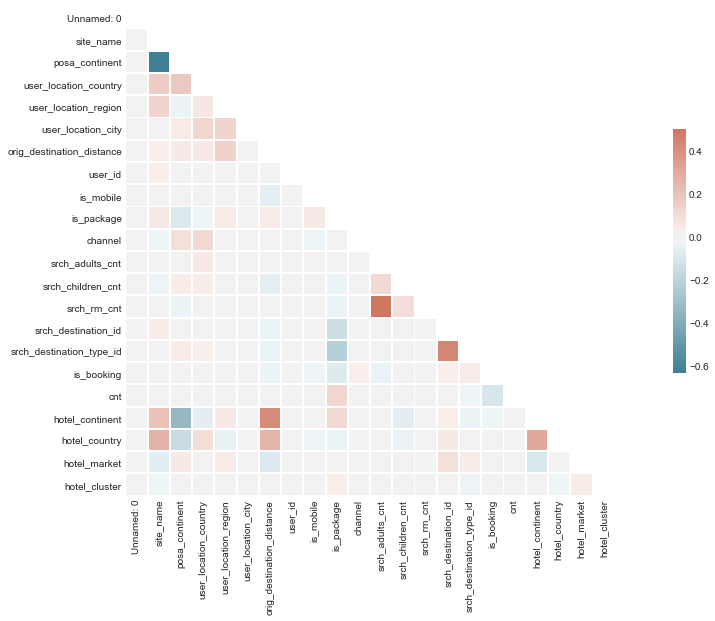

In [11]:
#correlation plot

corr = sample.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .5})

In [12]:
# distribution of number of booking attempts
sample.groupby('user_id')['is_booking']\
   .agg({'num_of_bookings':'count'}).reset_index()\
   .groupby('num_of_bookings')['user_id']\
   .agg('count')

num_of_bookings
1    79189
2     8423
3     1065
4      161
5       24
6        1
Name: user_id, dtype: int64

In [13]:
sample = sample.merge(sample.groupby('user_id')['is_booking']
    .agg(['count']).reset_index())

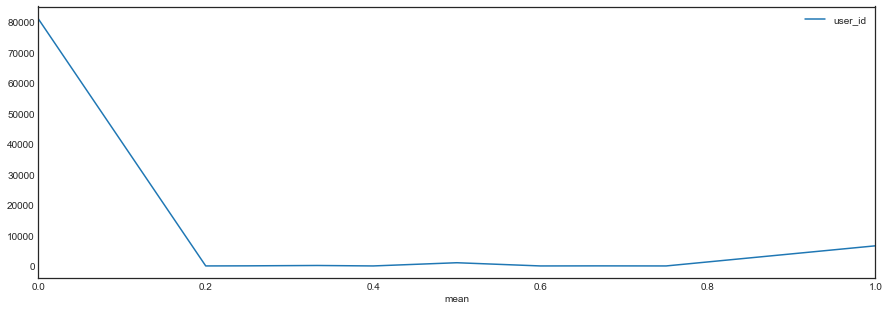

In [14]:
# distribution of booking rate
sample.groupby('user_id')['is_booking']\
   .agg(['mean']).reset_index()\
   .groupby('mean')['user_id']\
   .agg('count')

(sample.groupby('user_id')['is_booking']\
   .agg(['mean']).reset_index()\
   .groupby('mean')['user_id']\
   .agg('count').reset_index()).plot(x='mean', y='user_id')

In [15]:
#number of guests need to be > 0
pd.crosstab(sample['srch_adults_cnt'], sample['srch_children_cnt'])
sample.drop(sample[sample['srch_adults_cnt'] + sample['srch_children_cnt']==0].index)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,1,9,2014-08-26,2014-08-31,1,0,1,8286,1,0,1,0,63,1258,14,2
2,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,1
3,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22,1
4,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42,2
5,4691128,2014-07-22 12:22:25,11,3,205,411,54864,209.6633,106611,0,0,0,2014-07-29,2014-08-01,1,0,1,9819,3,0,2,2,198,1234,90,2
6,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,0,9,2014-08-03,2014-08-08,2,1,1,12812,5,0,1,2,50,368,83,1
7,34825186,2014-12-16 14:34:39,2,3,66,220,38273,53.7481,260938,0,0,9,2014-12-16,2014-12-17,2,0,1,3448,3,0,1,2,50,582,54,1
8,24023139,2014-01-28 13:16:36,2,3,66,337,54287,329.1833,908558,0,0,2,2014-02-27,2014-03-01,2,0,1,8287,1,1,1,2,198,400,6,1
9,8184643,2014-02-27 08:29:19,24,2,3,38,4999,NaN,1161104,0,1,0,2014-07-16,2014-07-20,1,0,1,8856,1,0,1,2,50,636,0,1


In [16]:
sample['srch_co'] = pd.to_datetime(sample['srch_co'])
sample['srch_ci'] = pd.to_datetime(sample['srch_ci'])
sample['date_time'] = pd.to_datetime(sample['date_time'])
sample['date'] = pd.to_datetime(sample['date_time'].apply(lambda x: x.date()))

In [17]:
# Check-out date need to be later than check-in date;
# Check-in date need to be later than booking date

sample[sample['srch_co'] < sample['srch_ci']][['srch_co', 'srch_ci']]
sample[sample['srch_ci'] < sample['date']][['srch_ci', 'date']]

,srch_ci,date
7138,2014-01-05,2014-01-07
14931,2014-10-13,2014-10-14
18778,2014-06-11,2014-11-10
22722,2014-02-11,2014-10-09
25886,2014-03-10,2014-09-15
26795,2014-09-12,2014-12-02
29591,2014-08-02,2014-08-23
33886,2013-01-16,2013-01-17
33887,2014-03-03,2014-03-04
33888,2013-01-21,2013-01-22


## explore the data - create new variables that might be useufl

In [18]:
def duration(row):
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

sample['duration'] = sample.apply(duration, axis=1)
sample['days_in_advance'] = sample.apply(days_in_advance, axis=1)

In [19]:
############## Outperforming/underperforming segments #############
cat_list = ['site_name', 'posa_continent',
       'user_location_country', 'user_location_region',
       'user_location_city', 'channel',
       'srch_destination_id', 'srch_destination_type_id',
        'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster']

In [20]:
# for all columns
for i in cat_list:
    print(sample.groupby(i)['is_booking']
          .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})
          .reset_index()
          .sort_values(by='booking_rate'))


    site_name  booking_rate  num_of_bookings
35         44      0.000000                0
10         16      0.000000                0
29         35      0.025271                7
27         33      0.036170               17
12         18      0.036603               25
1           6      0.037037                2
39         48      0.039216                2
15         21      0.041667                2
30         36      0.042017                5
26         32      0.050000               12
19         25      0.052727               29
37         46      0.054945                5
21         27      0.059259               16
13         19      0.060606                2
3           8      0.061489              152
8          14      0.062500                9
20         26      0.062814               25
17         23      0.064024              126
2           7      0.064935                5
33         40      0.065217                9
18         24      0.066398              428
5         

In [21]:
# booking rate per channel
sample.groupby('channel')['is_booking']\
    .agg({'booking_rate': 'mean', 'num_of_bookings': 'sum'})\
    .reset_index()\
    .sort_values(by='booking_rate')

,channel,booking_rate,num_of_bookings
7,7,0.043157,35
8,8,0.055351,15
3,3,0.060400,266
2,2,0.060490,474
6,6,0.067901,11
1,1,0.069690,716
0,0,0.071948,901
9,9,0.085381,4726
5,5,0.094349,581
4,4,0.120784,265


In [22]:
sample['is_booking'].mean()

0.07993

## clustering - what are the similar user cities? 

### Step 1: what are the features I am going to use (that make sense)?
### What features may distinguish cities? based on business sense and exploratory analysis

In [23]:


num_list = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']
city_data = sample.dropna(axis=0)[num_list + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)


In [24]:
# Step 2: shall I standardise the data?
# What is the magnitude of data range?

city_groups_std = city_groups.copy()
for i in num_list:
    city_groups_std[i] = preprocessing.scale(city_groups_std[i])

### Step 3: select clustering method and number of clusters
 using an ad-hoc k=3 here, there are methods to help derive the optimal number for k


In [25]:
#
km = cluster.KMeans(n_clusters=3, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[num_list])


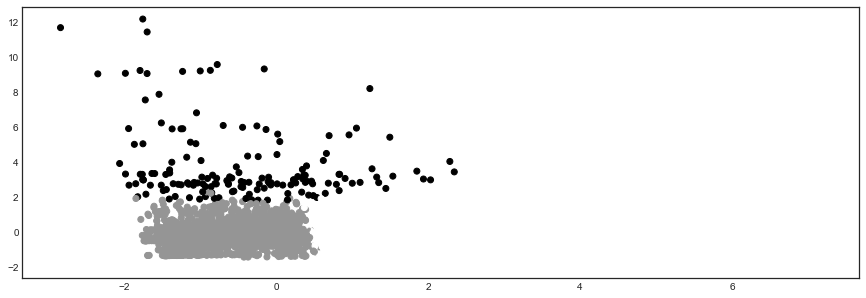

In [26]:
# Principal Component Analysis
pca = decomposition.PCA(n_components=2, whiten=True)
pca.fit(city_groups[num_list])
city_groups_std['x'] = pca.fit_transform(city_groups_std[num_list])[:, 0]
city_groups_std['y'] = pca.fit_transform(city_groups_std[num_list])[:, 1]
plt.scatter(city_groups_std['x'], city_groups_std['y'], c=city_groups_std['cluster'])
plt.show()


In [39]:
# Step 4: profile the clusters
# merging the two dataframes based on a common column user_location_city
city_groups.merge(city_groups_std[['user_location_city', 'cluster']])\
    .groupby('cluster')\
    .mean() # for every column


,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,28928.177920,5.269123,101.621451,3165.736716,0.110117,0.485444,2.012862,0.320562,1.068177
1,28058.147131,2.752893,41.249523,1350.322465,0.143095,0.175788,1.983657,0.367816,1.072983
2,30968.584906,3.042977,55.292086,1543.666930,0.137788,0.189832,4.203564,0.565356,2.455660


### Step 5: assess the statistical robustness
### A statistically robust segmentation return similar results using different clustering methodologies


In [40]:
from sklearn.cross_validation import train_test_split

# choose a cluster and split them into test and train
sample = sample.merge(city_groups_std[['user_location_city', 'cluster']], left_on='user_location_city', right_on='user_location_city', how='outer')
sample.groupby('cluster')['is_booking'].count()


cluster
0.0     7109
1.0    62155
2.0      317
Name: is_booking, dtype: int64

In [41]:
# choose one of the city clusters to analyze
tree_data = sample.dropna(axis = 0)[sample['cluster']==2]
tree_train, tree_test = train_test_split(tree_data, test_size=0.2, random_state=1, stratify=tree_data['is_booking'])


In [42]:
# build the decision tree model
clf = tree.DecisionTreeClassifier(max_leaf_nodes=6, min_samples_leaf=200)
clf = clf.fit(tree_train[num_list], tree_train['is_booking'])

In [43]:
# test_preds = clf.predict(X = tree_test[num_list])
# clf.predict_proba(tree_test[num_list])


In [44]:
# scoring of the prediction model
clf.score(tree_test[num_list], tree_test['is_booking'])

0.93877551020408168

In [45]:
############### Logistic regression - what lead to a higher chance of booking for individuals? ###############
#create dummy variable channel
sample['channel'].value_counts()
sample['new_channel'] = [i if i in [9, 0, 1, 2] else 'other' for i in sample['channel']]
dummy_channels = pd.get_dummies(sample['new_channel'], prefix='channel')
sample = sample.join(dummy_channels.ix[:, :])
sample['log_orig_destination_distance'] = [np.log(i) for i in sample['orig_destination_distance']]


In [46]:
var_list = ['duration', 'days_in_advance', 'log_orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'channel_1',
            'channel_2', 'channel_9', 'channel_other']

In [47]:
# create logistic estimator

import statsmodels.api as sm
logit = sm.Logit(sample['is_booking'], sample[var_list], missing='drop')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.277711
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_booking   No. Observations:                63587
Model:                          Logit   Df Residuals:                    63575
Method:                           MLE   Df Model:                           11
Date:                Thu, 23 Aug 2018   Pseudo R-squ.:                 0.03220
Time:                        11:31:36   Log-Likelihood:                -17659.
converged:                       True   LL-Null:                       -18246.
                                        LLR p-value:                3.549e-245
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
duration                         -0.1939      0.010    -20.121      0.000      -0.213      -0.175
days_in_advance                  -0.0033      0.000    -10.065      0.000      -0.004      -0.003
log_orig_destination_distance    -0.0872      0.007    -13.263      0.000      -0.100      -0.074
is_mobile                        -0.3966      0.047     -8.396      0.000      -0.489      -0.304
is_package                       -0.3893      0.046     -8.507      0.000      -0.479      -0.300
srch_adults_cnt                  -0.3655      0.020    -18.243      0.000      -0.405      -0.326
srch_children_cnt                -0.1235      0.022     -5.686      0.000      -0.166      -0.081
srch_rm_cnt                       0.0190      0.037      0.514      0.608      -0.053       0.091
channel_1                        -0.4677      0.060     -7.755      0.000      -0.586      -0.349
channel_2                        -0.6094      0.068     -9.019      0.000      -0.742      -0.477
channel_9                        -0.3005      0.037     -8.163      0.000      -0.373      -0.228
channel_other                    -0.2038      0.053     -3.815      0.000      -0.309      -0.099
=================================================================================================
"""

In [48]:
# convert logit to odds ratio
np.exp(result.params)
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
duration,0.808313,0.839434,0.823727
days_in_advance,0.996095,0.997367,0.996731
log_orig_destination_distance,0.904742,0.928367,0.916479
is_mobile,0.613113,0.737839,0.672591
is_package,0.619419,0.741119,0.677542
srch_adults_cnt,0.667124,0.721632,0.693843
srch_children_cnt,0.847003,0.922264,0.883833
srch_rm_cnt,0.948031,1.095565,1.019132
channel_1,0.556636,0.705072,0.626473
channel_2,0.476240,0.620657,0.543675


In [49]:
# predicted values
sample['pred'] = result.predict(sample[var_list])

In [50]:
sample.head(5)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,count,date,duration,days_in_advance,cluster,new_channel,channel_0,channel_1,channel_2,channel_9,channel_other,log_orig_destination_distance,pred
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2,2014-11-03,4.0,42.0,0.0,1,0,1,0,0,0,6.122745,0.046699
1,24636169,2014-07-28 23:50:54,24,2,77,871,36643,454.4611,792280,0,1,9,2014-08-26,2014-08-31,1,0,1,8286,1,0,1,0,63,1258,14,2,2014-07-28,5.0,29.0,0.0,9,0,0,0,1,0,6.119112,0.066947
2,27484128,2013-05-08 09:03:55,8,4,77,871,36643,10098.2149,1197536,0,1,3,2013-07-01,2013-07-02,3,1,1,15304,1,0,1,6,105,919,22,3,2013-05-08,1.0,54.0,0.0,other,0,0,0,0,1,9.220114,0.048844
3,27483946,2013-04-13 15:49:07,8,4,77,871,36643,9887.6021,1197536,0,0,1,2013-07-10,2013-07-11,2,1,1,8813,1,0,2,6,107,186,36,3,2013-04-13,1.0,88.0,0.0,1,0,1,0,0,0,9.199037,0.069941
4,27484095,2013-04-24 10:34:33,8,4,77,871,36643,9969.1184,1197536,0,0,2,2013-06-28,2013-06-30,2,1,1,13834,4,0,2,6,105,35,17,3,2013-04-24,2.0,65.0,0.0,2,0,0,1,0,0,9.207247,0.054750


In [51]:
# plot variable VS. marketing_channel
sample.groupby('channel')['is_booking'].mean()


channel
0     0.071948
1     0.069690
2     0.060490
3     0.060400
4     0.120784
5     0.094349
6     0.067901
7     0.043157
8     0.055351
9     0.085381
10    0.200000
Name: is_booking, dtype: float64

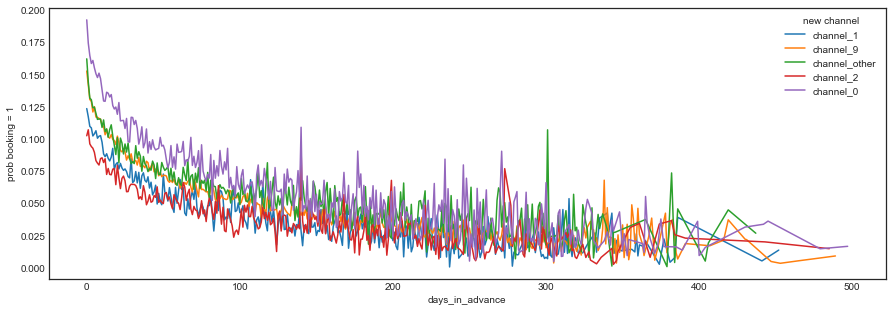

In [52]:
def plot_vs_marketing_channel(variable):
    grouped = pd.pivot_table(sample[(sample['pred'].isnull() == False)], values = ['pred'], index=[variable, 'new_channel'], aggfunc=np.mean)
    colors = 'rbgyrbgy'
    for col in sample.new_channel.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['pred'])
    pl.xlabel(variable)
    pl.ylabel('prob booking = 1')
    pl.legend(['channel_'+str(i) for i in list(sample.new_channel.unique())], loc='upper right', title='new channel')
    # pl.show()
plot_vs_marketing_channel('days_in_advance')
